# Multiple Linear Regression
## Prediction of car prices

### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

### Business Goal 

- You are required to model the price of cars with the available independent variables. It will be used by the management understand how exactly the prices vary with the independent variables.They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 

## Essentially, the company wants

- To understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

- To create a linear model that quantitatively relates car prices with variables describing the price of a car like fuel type, carbody, drivewheel, enginelocation, wheelbase, horsepower, fuelsystem...

- To know the accuracy of the model, i.e. how well these variables can predict car prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the car dataset

In [151]:
# import all libraries required to solve the problem

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas and numpy for data manipulation
import numpy as np
import pandas as pd

# satplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 200)

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

## Import label encoder to convert variables to numerical form
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
  
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import stats variable to get model summary like p-value, VIF
import statsmodels.api as sm 

In [152]:
car_df = pd.read_csv("./CarPrice_Assignment.csv")

In [153]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [154]:
car_df.shape

(205, 26)

In [155]:
#From car info we will get to know what id the type of the data for each feature and whether there any null values.
car_df.info()

#From the output we can see that there are no null values. All the columns has 205 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [156]:
#Just to reverify whether there are any null values
print ("Total count of null values {}\n".format(car_df.isnull().values.sum()))

Total count of null values 0



In [157]:
#No analysis can be done on this variable
car_df = car_df.drop('car_ID',axis=1)

In [158]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = car_df[car_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

## No duplicate rows exist

Duplicate Rows except first occurrence based on all columns are :


(0, 25)

##### Lets first get CompanyName from CarName
There is a variable named CarName which is comprised of two parts 
- the first word is the name of 'car company' and 
- the second is the 'car model'. 
- For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. 
- You need to consider only company name as the independent variable for model building. 

In [159]:
car_df['CompanyName'] = car_df['CarName'].apply(lambda x: x.split(' ')[0])
#Lets drop CarName from our actual data, since we dont want to consider as independent variable while calculating 
car_df = car_df.drop('CarName',axis=1)
car_df['CompanyName'].value_counts()  ##CompanyName has 28 variables 

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: CompanyName, dtype: int64

#### Data cleaning for Company Name
we can see there are some misspelled car names like 
- toyouta instead of toyota
- porcshce instead of porsche
- Nissan instead of Nissan 
- vokswagen instead of volkswagen and vw instead of volkswagen
- maxda instead of mazda

In [160]:
car_df['CompanyName'] = car_df['CompanyName'].replace(to_replace="toyouta",value ="toyota") 
car_df['CompanyName'] = car_df['CompanyName'].replace(to_replace="porcshce",value="porsche")
car_df['CompanyName'] = car_df['CompanyName'].replace(to_replace="Nissan",value="nissan")
car_df['CompanyName'] = car_df['CompanyName'].replace(to_replace="vokswagen",value="volkswagen")
car_df['CompanyName'] = car_df['CompanyName'].replace(to_replace="vw",value="volkswagen")
car_df['CompanyName'] = car_df['CompanyName'].replace(to_replace="maxda",value="mazda")

car_df['CompanyName'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CompanyName, dtype: int64

#### Identify Categorical and Numerical variables

In [161]:
#Identify categorical and numerical columns for the car_df

#total columns
total_cols = car_df.columns
#numerical columns
num_cols = car_df._get_numeric_data().columns
#categorical columns
categorical_list = list(set(total_cols) - set(num_cols))
numerical_list = num_cols.to_list()

print("No of Categorical columns : " + str(len(categorical_list)))

print("No of Numerical columns : " + str(len(numerical_list)))

No of Categorical columns : 10
No of Numerical columns : 15


### Individual Feature Statistics

#### Summary statistics for minimum, maximum, mean, median, standard deviation, and distinct count were calculated for numeric columns, and the results taken from 205 observations are shown here:

In [162]:
car_df.describe(percentiles=[.25, .5, .75, .90, .954, .99, .997])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
95.4%,3.000000,111.232000,198.170400,70.561600,57.992800,3511.160000,206.696000,3.780000,3.640000,21.961600,182.000000,6000.000000,37.616000,43.000000,33452.000000
99%,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

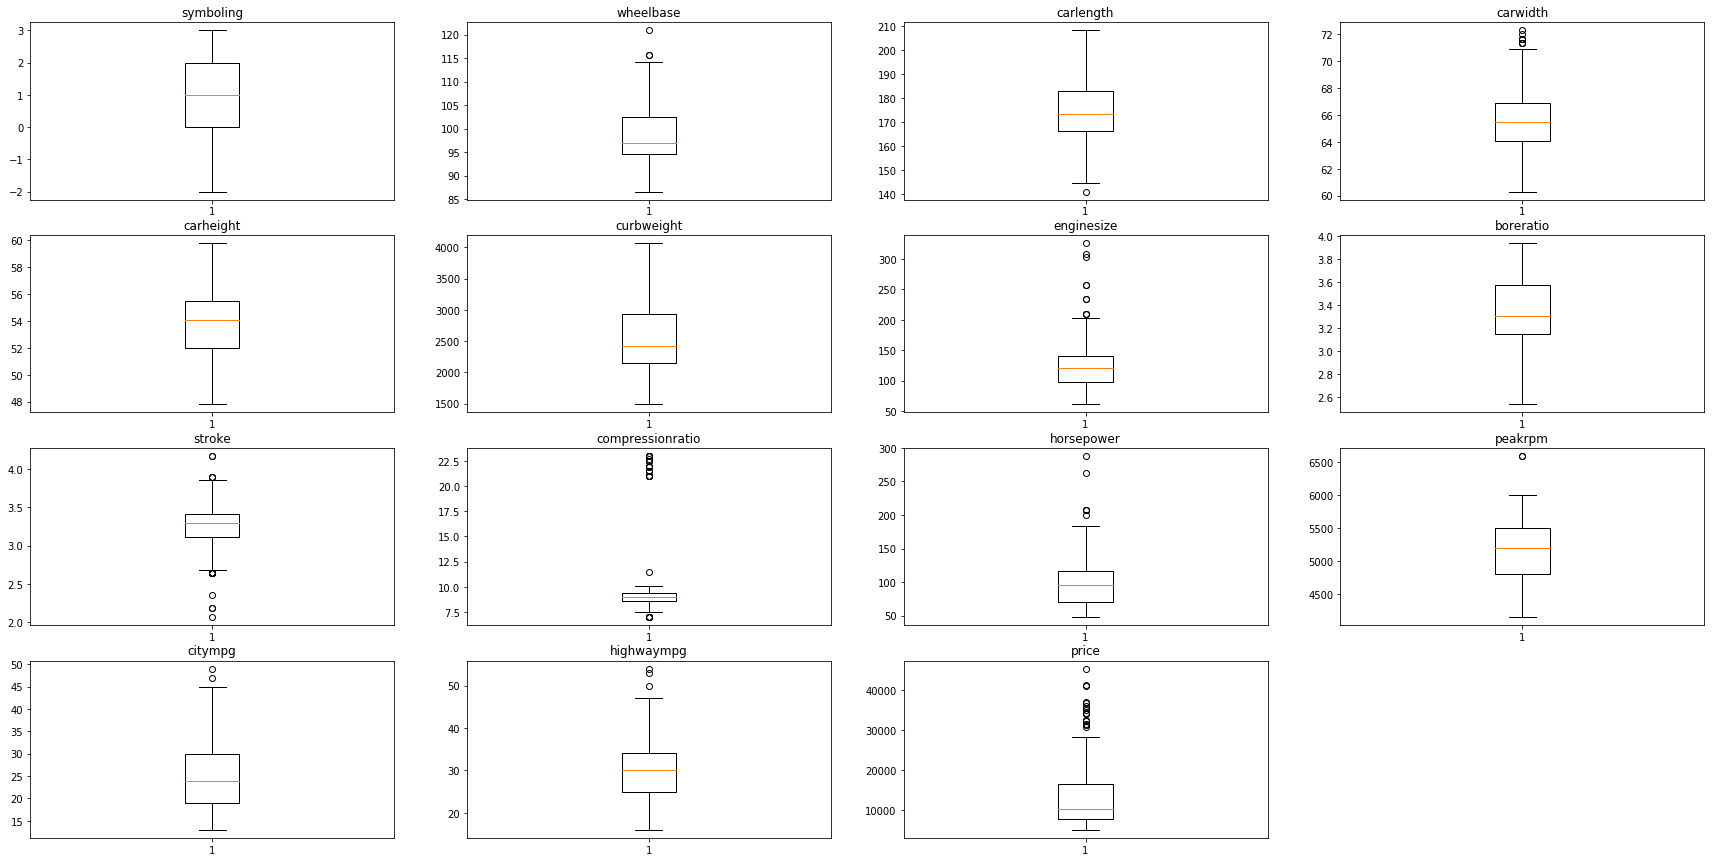

In [163]:
#To check for outliers we need to plot boxplot for these columns
plt.subplots(2,5,figsize=(30,15))
for i in range(1,16):
    plt.subplot(4,4,i)
    plt.title(numerical_list[i-1])
    plt.boxplot(car_df[numerical_list[i-1]])
    
plt.show()

### Discover outliers with mathematical function Z-Score

#### Wikipedia Definition
##### The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

#### The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

#### You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

#### We will use Z-score function defined in scipy library to detect the outliers.

In [164]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(car_df[numerical_list]))
car_df = car_df[(z < 3).all(axis=1)]
car_df.describe(percentiles=[.25, .5, .75, .90, .954, .99, .997])


## if we see 99.7% and max will be same for most of the variables, because we considered values as outliers if it is outside of the range mean+/-3sigma

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.856354,98.390055,173.379558,65.767956,53.683978,2522.016575,123.491713,3.335028,3.260221,9.538232,102.828729,5145.303867,24.895028,30.491713,12570.227442
std,1.269876,5.522098,11.483557,1.964708,2.473081,472.292841,32.337735,0.260012,0.279634,2.924266,33.955338,457.581251,5.560279,5.814368,6755.450363
min,-2.000000,86.600000,144.600000,61.800000,48.800000,1819.000000,70.000000,2.680000,2.360000,7.000000,60.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.000000,51.600000,2128.000000,97.000000,3.150000,3.110000,8.600000,72.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,96.500000,173.000000,65.400000,54.100000,2410.000000,120.000000,3.330000,3.270000,9.000000,95.000000,5200.000000,24.000000,30.000000,10198.000000
75%,2.000000,101.200000,180.200000,66.500000,55.500000,2910.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16430.000000
90%,3.000000,106.700000,188.800000,68.400000,56.500000,3139.000000,171.000000,3.620000,3.540000,9.500000,156.000000,5800.000000,31.000000,38.000000,19699.000000
95.4%,3.000000,109.100000,192.196000,70.300000,58.588000,3392.480000,183.000000,3.774400,3.640000,21.000000,161.720000,5972.000000,36.440000,40.440000,28227.840000
99%,3.000000,114.480000,199.640000,71.460000,59.240000,3742.000000,214.000000,3.780000,3.900000,21.500000,207.000000,6000.000000,38.000000,43.000000,35420.800000


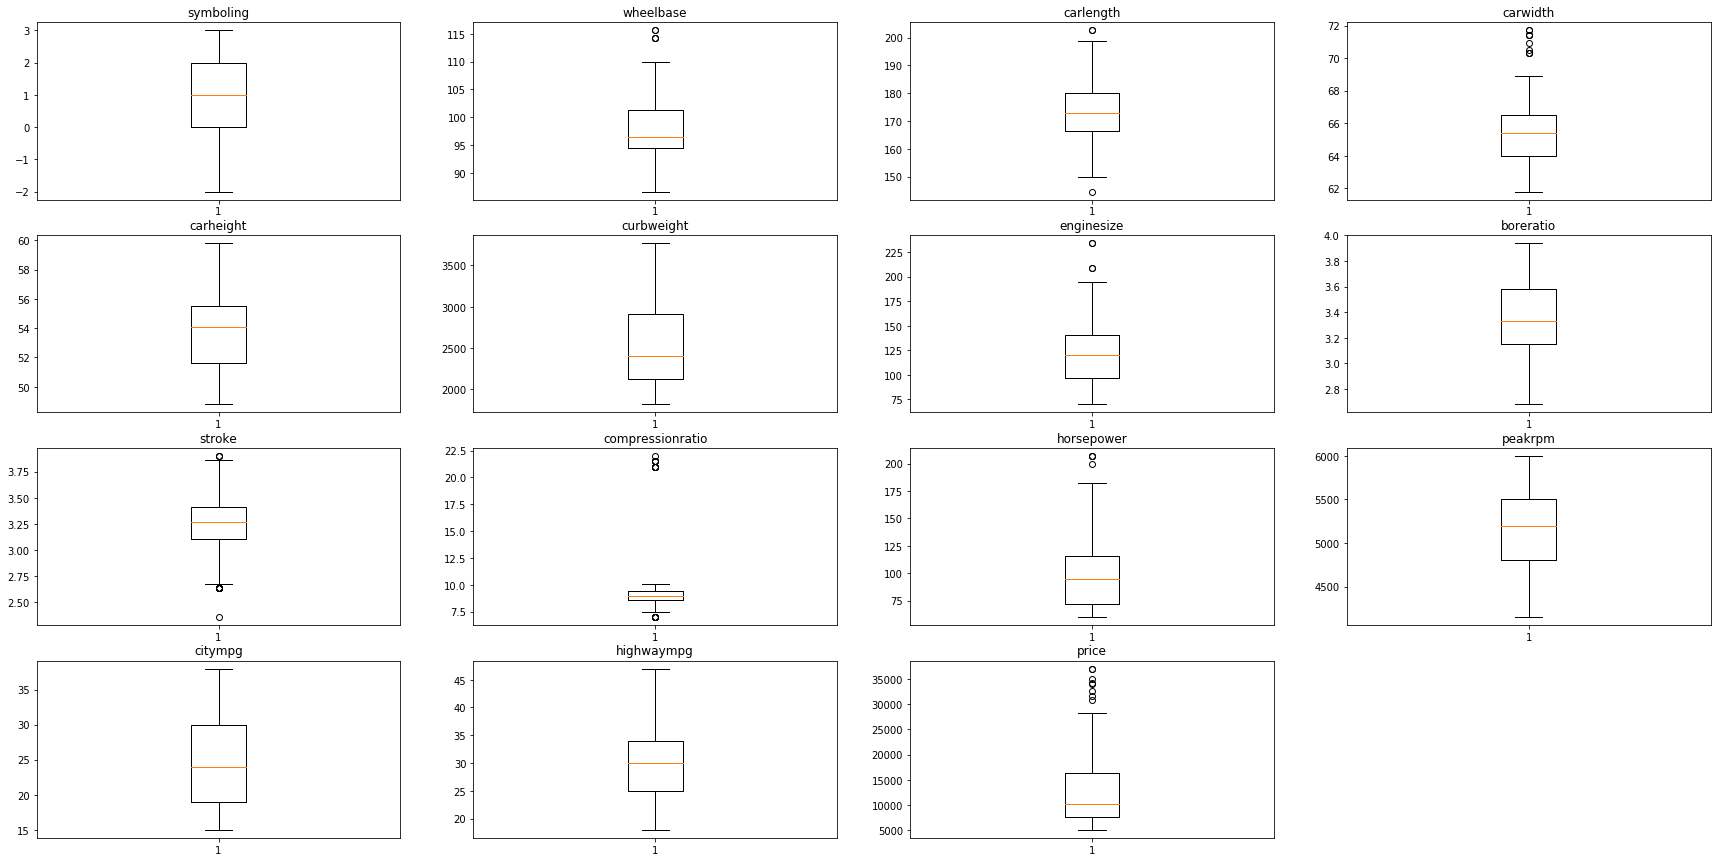

In [165]:
#After the removal of outlier we need to plot boxplot to cross check
plt.subplots(2,5,figsize=(30,15))
for i in range(1,16):
    plt.subplot(4,4,i)
    plt.title(numerical_list[i-1])
    plt.boxplot(car_df[numerical_list[i-1]])
    
plt.show()

#### Infer from the above statistical metrics and boxplots 
- We can see that most of the outliers for columns such as wheelbase, enginesize, horsepower, highwaympg and price are removed

In [166]:
# total number of rows after removal of outliers
print("No of rows removed during outlier " + str(205-car_df.shape[0]))
print("Final No of rows " + str(car_df.shape[0]))

No of rows removed during outlier 24
Final No of rows 181


#### Since Price is of interest in this analysis, it was noted that the mean and median of this value are significantly different and that the comparatively large standard deviation indicates that there is considerable variance in the prices of the automobiles.  

#### Lets visualise it using histogram

#### A histogram of the Price column shows that the price values are right-skewed – in other words, most cars are priced at the lower end of the price range, as shown here in the below:

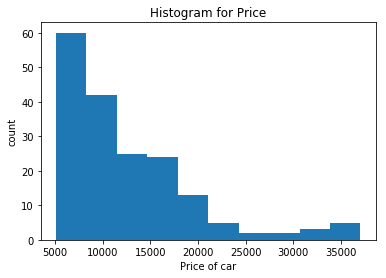

In [167]:
ax = plt.hist(x='price', data=car_df)
plt.xlabel('Price of car')
plt.ylabel('count')
plt.title('Histogram for Price')
plt.show()

#### Categorical features in our data :

- drivewheel – fwd,rwd,4wd (3 values)
- doornumber – four or two (2 values)
- carbody – sedan, hatchback, wagon, hardtop, or convertible (5 values)
- enginetype – ohc, ohcf, ohcv, dohc, l, rotor, or dohcv (7 values)
- cylindernumber – two, three, four, five, six, eight, or twelve (7 values)
- aspiration – std or turbo (2 values)
- fuelsystem – mpfi, 2bbl, idi, 1bbl, spdi, 4bbl, mfi, spfi (8 values)
- fueltype – gas or diesel (2 values)
- enginelocation - front or rear (2 values)
- CompanyName – One of 22 manufacturers

#### Count plots are similar to bar charts - created to show frequency of the features

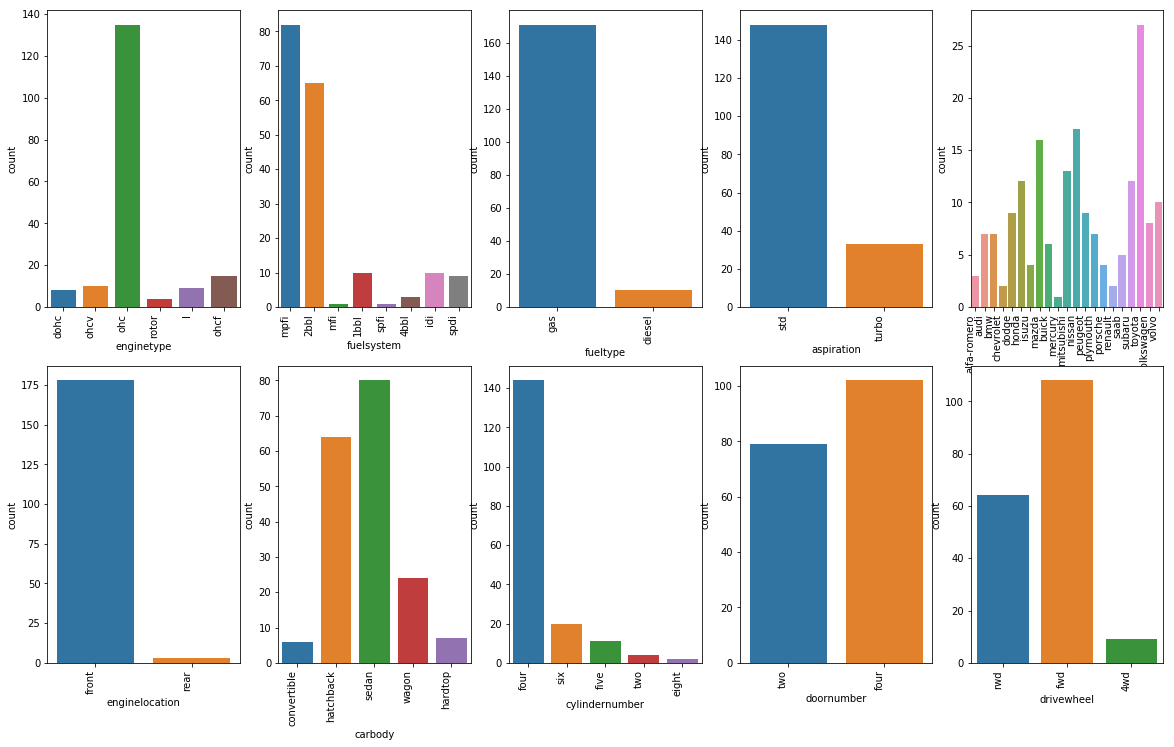

In [168]:
count = len(categorical_list)

plt.figure(figsize=(20, 12))
rows=2
columns=count//rows
i=1

for column in categorical_list:
    plt.subplot(rows,columns,i)
    ax = sns.countplot(x=column, data=car_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
    i+=1
plt.show()

##### From the count plots we can infer from our data
- `fwd` drive wheels are more common than sum of rwd+4wd
- `four` doors are more common in the cars
- `sedans` are the most common body style, followed by hatchbacks and wagons; hardtops and convertibles are relatively uncommon
- `ohc` engine is available in marjority of the cars
- `four` cylinders are most common, with very small frequencies for each of the other values
- `std` aspiration cars are more common than turbo cars
- `mpfi` most common fuel type, with 2bbl the next most common. All other types have much lower frequencies
- `gas` fueltype is available in most of the cars
- `rear` enginer cars are extremely uncommon.
- `toyota` cars are more common, followed by nissan and mazda..

### Correlation and Apparent Relationships
#### After exploring the individual features, an attempt was made to identify relationships between features in the data – in particular, between Price and the other features.

### Numeric Relationships
#### The following scatter-plot matrix was generated initially to compare numeric features with one another. The key features in this matrix are shown here:

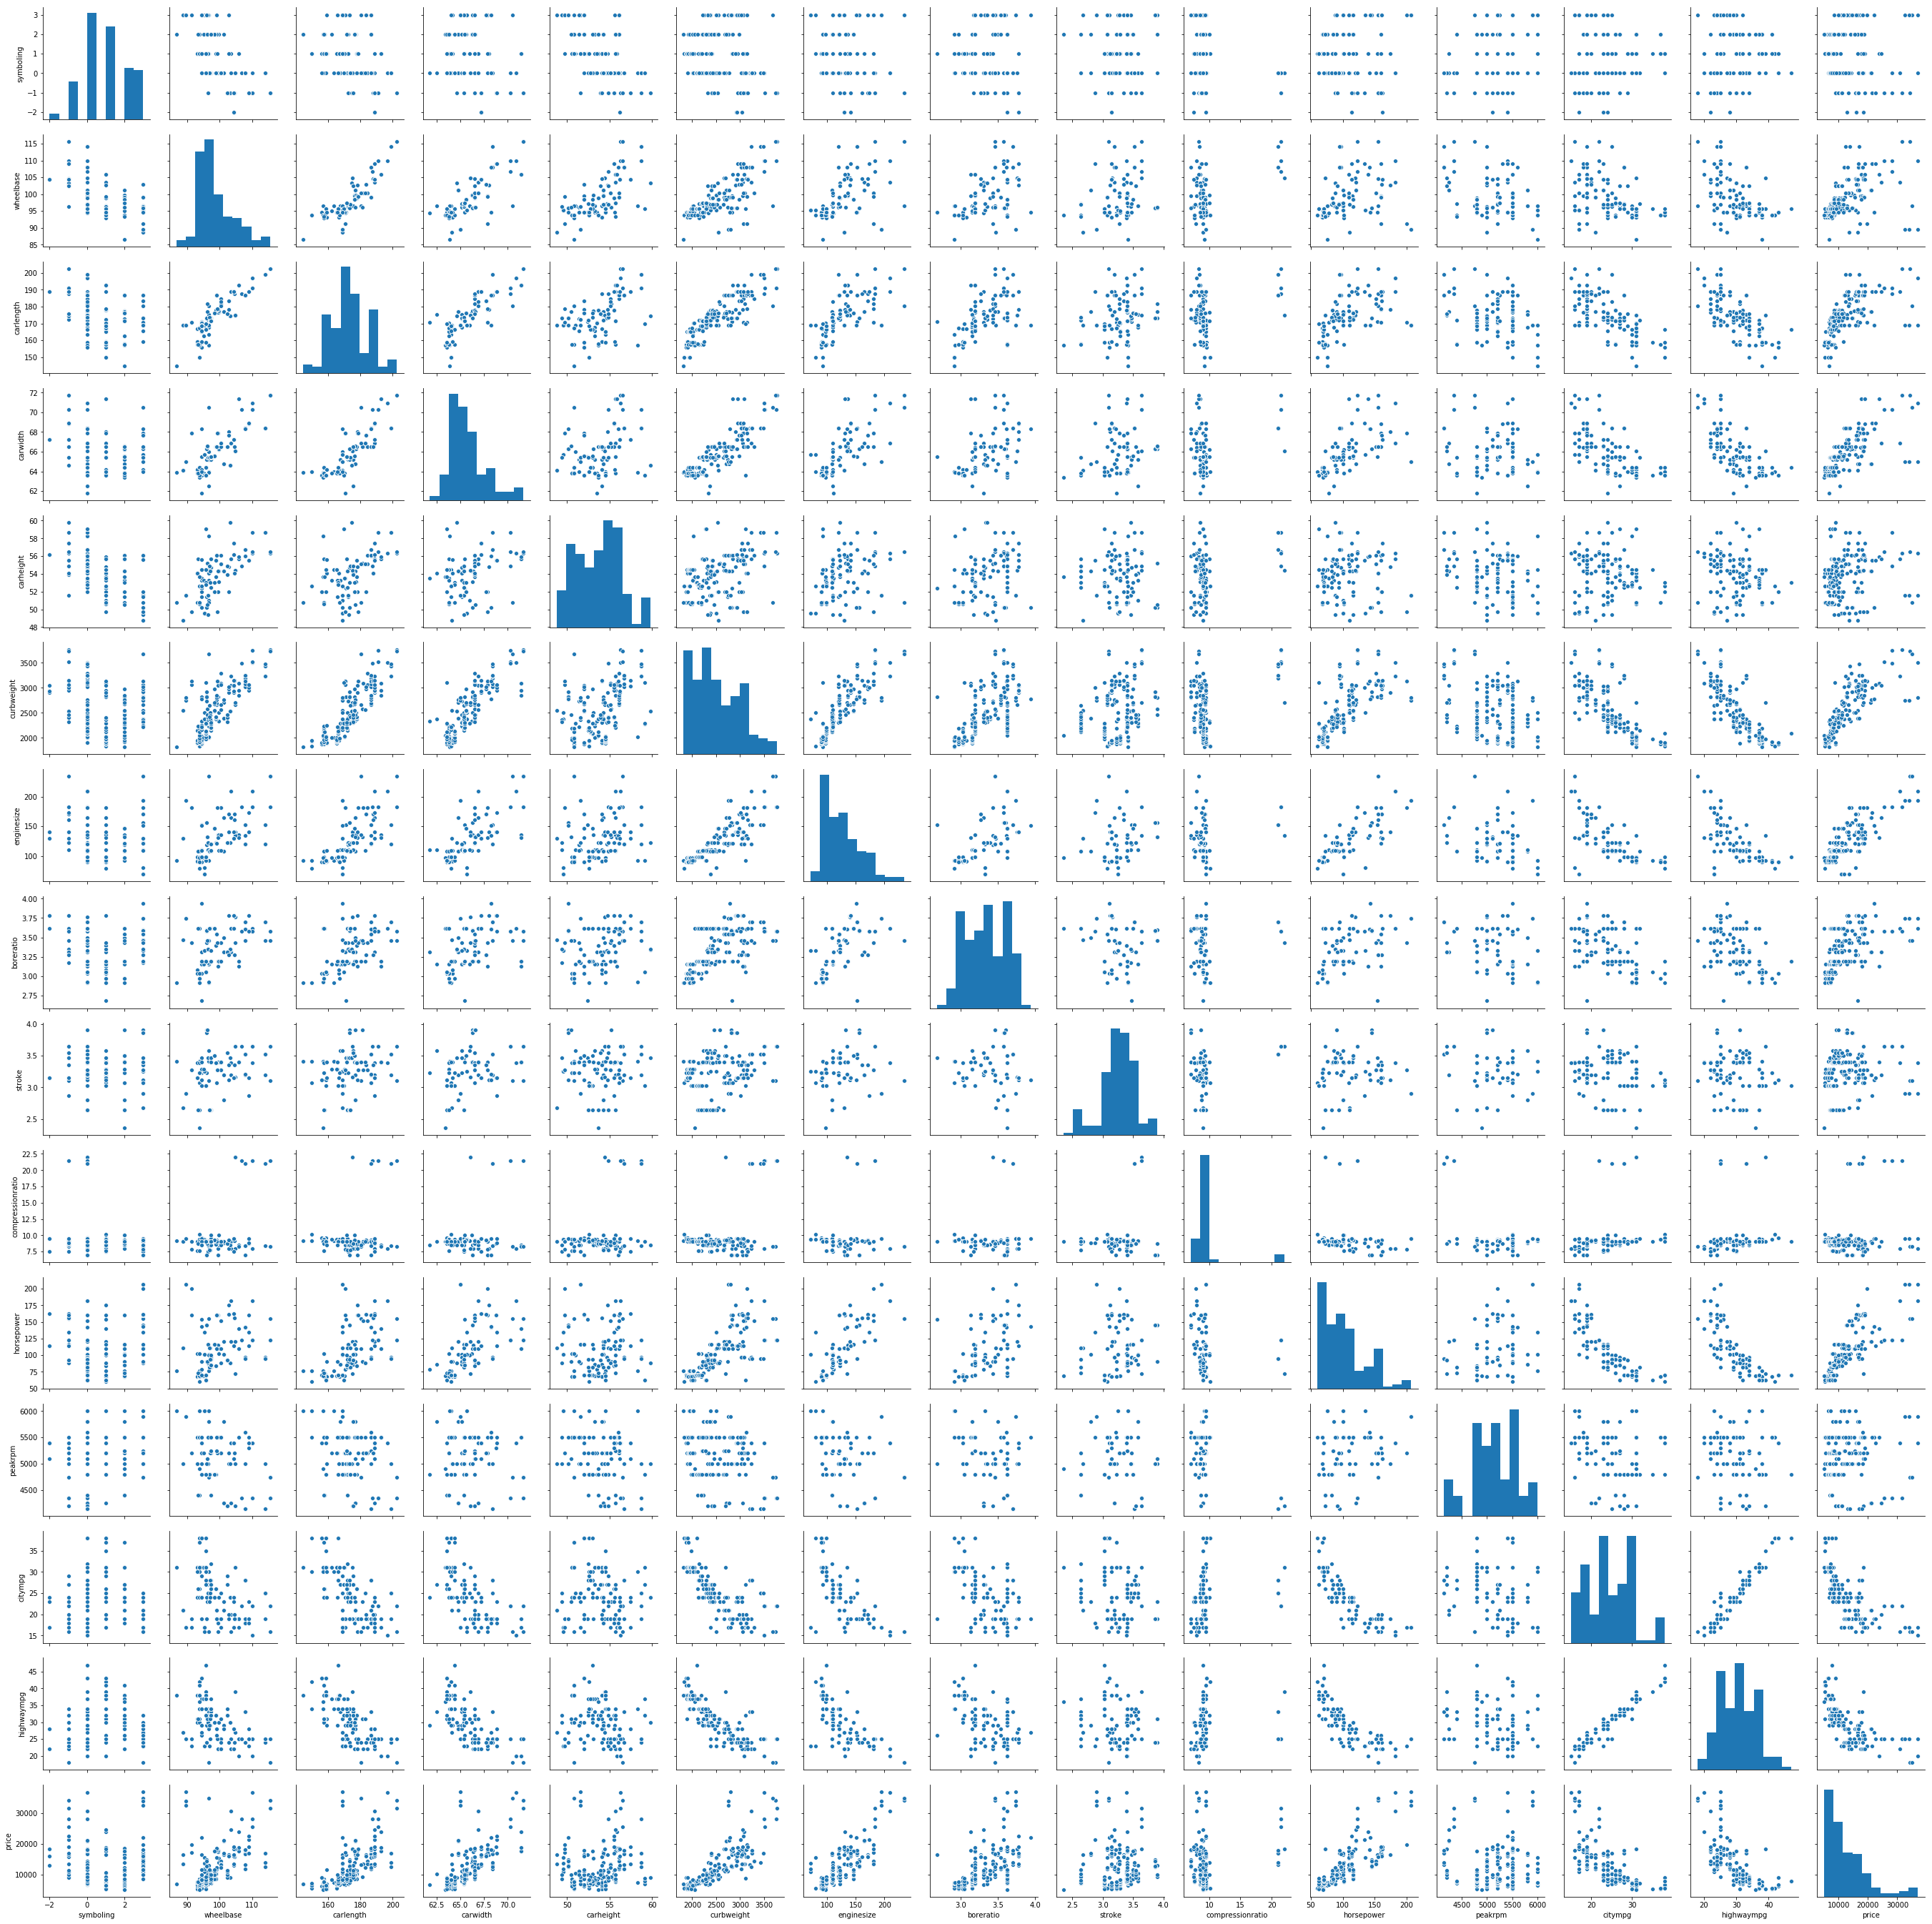

In [169]:
#For all the numeric variables we go for pairplot to correlation within 1 variable to another
sns.pairplot(car_df)
plt.show()

#### Infering from the above scatter plots
- Last row depicts relationship between 'price' vs other numeric variables
    - As `wheelbase,carlength,carwidth,carheight,curbweight,enginesize,horsepower` increases, as`price` increases
    - As citympg, highwaympg increases, as `price` reduces


#### The below correlations validate the plots by showing high negative correlation between citympg vs price, highwaympg vs price and moderate to strong positive correlations for the other numeric features.

In [170]:
car_df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.546936,-0.345475,-0.205601,-0.593706,-0.187166,-0.048868,-0.079742,0.028407,-0.211672,0.144245,0.280401,-0.121743,-0.049070,-0.018691
wheelbase,-0.546936,1.000000,0.852721,0.785857,0.642934,0.738266,0.504212,0.478336,0.210597,0.455534,0.295729,-0.366610,-0.397154,-0.482115,0.499827
carlength,-0.345475,0.852721,1.000000,0.834541,0.535407,0.862416,0.669178,0.630147,0.186116,0.304576,0.539213,-0.302475,-0.649054,-0.687753,0.638258
carwidth,-0.205601,0.785857,0.834541,1.000000,0.330651,0.845461,0.697293,0.537257,0.252077,0.340720,0.577538,-0.214014,-0.628317,-0.680733,0.711771
carheight,-0.593706,0.642934,0.535407,0.330651,1.000000,0.367013,0.157102,0.235046,-0.026810,0.301890,-0.038285,-0.319025,-0.081167,-0.153064,0.175122
curbweight,-0.187166,0.738266,0.862416,0.845461,0.367013,1.000000,0.845273,0.652555,0.204622,0.361447,0.731370,-0.291002,-0.758712,-0.810986,0.802365
enginesize,-0.048868,0.504212,0.669178,0.697293,0.157102,0.845273,1.000000,0.590338,0.216897,0.232949,0.800277,-0.271573,-0.666415,-0.686846,0.830473
boreratio,-0.079742,0.478336,0.630147,0.537257,0.235046,0.652555,0.590338,1.000000,-0.142472,0.223215,0.538746,-0.327666,-0.556403,-0.569398,0.536939
stroke,0.028407,0.210597,0.186116,0.252077,-0.026810,0.204622,0.216897,-0.142472,1.000000,0.209601,0.112209,-0.009500,-0.120880,-0.109853,0.051856
compressionratio,-0.211672,0.455534,0.304576,0.340720,0.301890,0.361447,0.232949,0.223215,0.209601,1.000000,-0.069926,-0.441438,0.114976,0.031200,0.263098


### Categorical Relationships
#### Having explored the relationship between price and numeric features, an attempt was made to discern any apparent relationship between categorical feature values and price. The following boxplots show the categorical columns that seem to exhibit a relationship with price

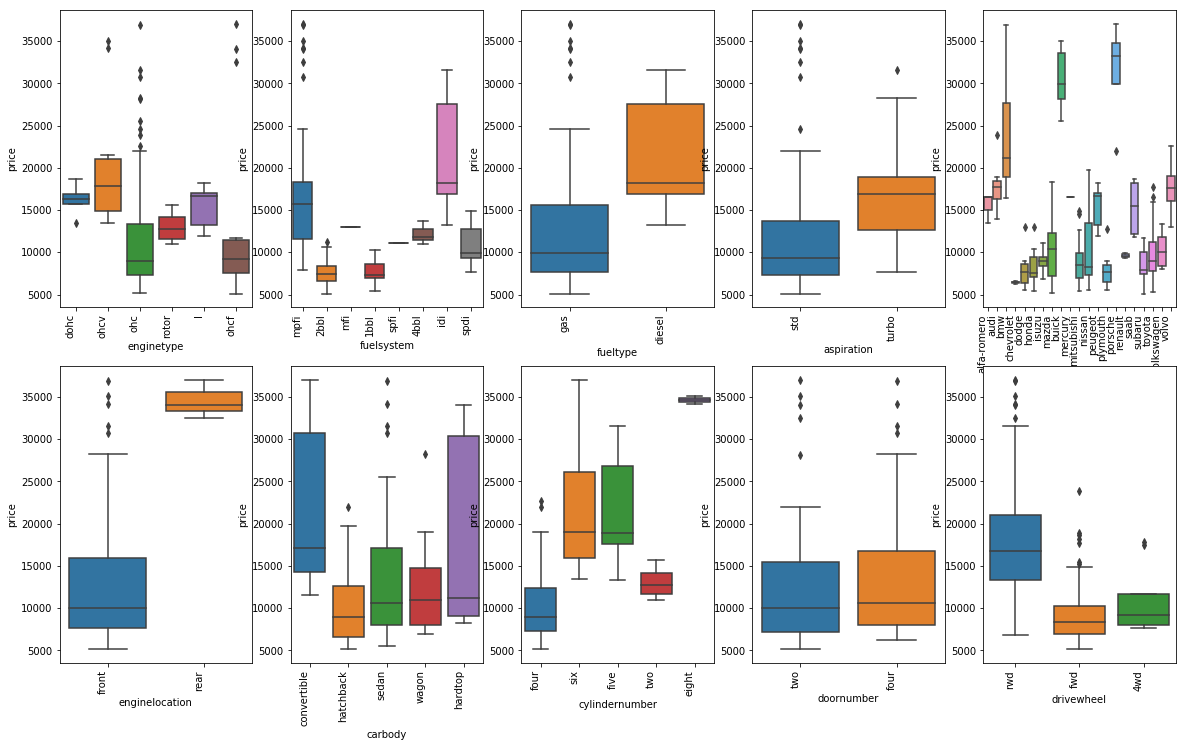

In [171]:
count = len(categorical_list)

plt.figure(figsize=(20, 12))
rows=2
columns=count//rows
i=1
for column in categorical_list:
    plt.subplot(rows,columns,i)
    ax = sns.boxplot(x = column, y = 'price', data = car_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
    i+=1
plt.show()

#### Infering from the above box plots
- Rear-wheel drive cars are typically more expensive than other types of car
- 8 cylinder cars are high priced cars
- There are a wider range of prices for gas cars than for diesel cars
- Rear-engine cars are significantly more expensive than front-engine cars and their prices fall within a smaller range (reflecting their comparative rarity).
- There are a few manufacturers that typically create expensive cars, some manufactures with predominantly mid-priced cars, and some that seem to specialize in lower-priced cars

### Multi-faceted Relationships

#### Apparent relationships between price and individual features are helpful in determining predictive heuristics. However, relationships are often more complex, and may only become apparent when multiple features are considered in combination with one another. 

#### To help identify these more complex relationships, some faceted plots were created.

#### The following plots show some interesting aspects of fueltype. Although the median price for gas and diesel cars is similar, it can be seen from these plots that fuel types can be indicative of horsepower and citympg, both of which are typically predictive of price.

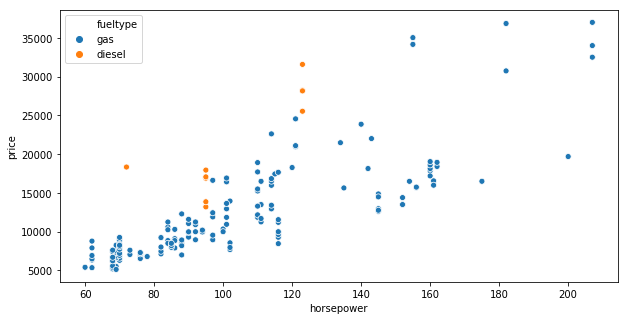

In [172]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = car_df)
plt.show()

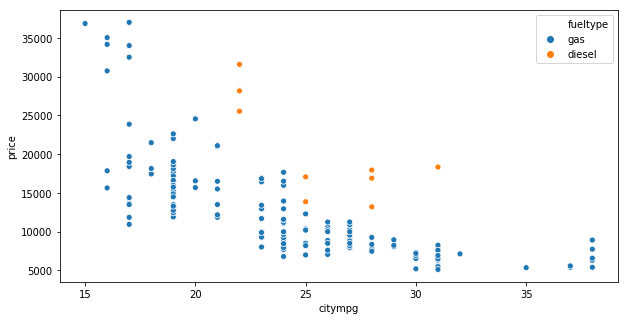

In [173]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'citympg', y = 'price', hue = 'fueltype', data = car_df)
plt.show()

#### From these plots, it can be seen that gasoline-based cars tend to have a higher horsepower, and a lower citympg than diesel cars; creating a cluster of low to mid-priced diesel cars compared to a wider range of gas car prices

## Step 3: Data Preparation

- You can see that your dataset has many columns with values like ('gas', 'diesel), or ('std', 'turbo')

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s

### Categorical variables : ['drivewheel', 'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'aspiration', 'fuelsystem', 'CarName', 'fueltype', 'enginelocation']

#### There are 2 categorical variables(doornumber, cylindernumber) where are the values are like four, two.. convert those to integer instead of 0/1

In [174]:
car_df['doornumber'] = car_df['doornumber'].map({'two':2,'four':4})

print(car_df['cylindernumber'].value_counts())

car_df['cylindernumber'] = car_df['cylindernumber'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

four     144
six       20
five      11
two        4
eight      2
Name: cylindernumber, dtype: int64


####  Other categorical variables having 2 unique values where mapped to 0,1

In [175]:
# List of variables to map
car_df['fueltype'] = car_df['fueltype'].map({'gas':1,'diesel':0})
car_df['aspiration'] = car_df['aspiration'].map({'std':1,'turbo':0})
car_df['enginelocation'] = car_df['enginelocation'].map({'front':1,'rear':0})

In [176]:
#We can see fueltype,aspiration,doornumber,enginelocation were replaced to 1,0
car_df.head(6)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,2,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,4,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,4,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
5,2,1,1,2,sedan,fwd,1,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0,audi


In [177]:
print("carbody: unique values " +str(len(car_df['carbody'].value_counts()))) 
print("drivewheel: unique values " +str(len(car_df['drivewheel'].value_counts())))
print("enginetype: unique values " +str(len(car_df['enginetype'].value_counts()))) 
print("fuelsystem: unique values " +str(len(car_df['fuelsystem'].value_counts()))) 
print("CompanyName: unique values " +str(len(car_df['CompanyName'].value_counts())))

carbody: unique values 5
drivewheel: unique values 3
enginetype: unique values 6
fuelsystem: unique values 8
CompanyName: unique values 21


In [178]:
print("carbody: unique values " +str(car_df['carbody'].value_counts()))
print("drivewheel: unique values " +str(car_df['drivewheel'].value_counts()))
print("enginetype: unique values " +str(car_df['enginetype'].value_counts()))
print("fuelsystem: unique values " +str(car_df['fuelsystem'].value_counts())) 
print("CompanyName: unique values " +str(car_df['CompanyName'].value_counts()))

carbody: unique values sedan          80
hatchback      64
wagon          24
hardtop         7
convertible     6
Name: carbody, dtype: int64
drivewheel: unique values fwd    108
rwd     64
4wd      9
Name: drivewheel, dtype: int64
enginetype: unique values ohc      135
ohcf      15
ohcv      10
l          9
dohc       8
rotor      4
Name: enginetype, dtype: int64
fuelsystem: unique values mpfi    82
2bbl    65
idi     10
1bbl    10
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
CompanyName: unique values toyota         27
nissan         17
mazda          16
mitsubishi     13
honda          12
subaru         12
volvo          10
dodge           9
peugeot         9
volkswagen      8
plymouth        7
bmw             7
audi            7
buick           6
saab            5
isuzu           4
porsche         4
alfa-romero     3
renault         2
chevrolet       2
mercury         1
Name: CompanyName, dtype: int64


#### Categorical variables having more than 2 unique values

In [179]:
# Get the dummy variables for thisfeatures
# create dummies
l1_dummies = ['carbody','drivewheel','enginetype','fuelsystem','CompanyName']

for variable in l1_dummies:
    status = pd.get_dummies(car_df[variable]) # creates n dummies if there are n unique values
    car_df = pd.concat([car_df, status], axis = 1) # concatinate to original data
    car_df = car_df.drop([variable],axis=1) # remove original variable

In [180]:
#we need only n-1, so we can remove 1 extra variable created
# I am removing variable having least frequency except for fwd(bcz fwd and rwd is highly negatively correlated, instead of removing 4fwd i am removing fwd)
car_df=car_df.drop(['convertible','fwd','rotor','spfi','mercury'],axis=1) 
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,4wd,rwd,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,mazda,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
car_df.shape
#originally we have 25 columns, we created extra 33 dummies 

(181, 58)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [182]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [183]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,4wd,rwd,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,mazda,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Rescaling the Features 

As we know scaling doesn't impact our model. It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. 

- Two common ways of rescaling:

    1. Min-Max scaling 
    2. Standardisation (mean-0, sigma-1) 

- For now I am choosing MinMax scaling.

In [184]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','doornumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,4wd,rwd,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,mazda,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
98,0.8,1,1,0.0,1,0.240741,0.235741,0.141304,0.436893,0.070675,0.5,0.194245,0.373016,0.603896,0.165517,0.048276,0.567568,0.695652,0.629630,0.098577,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12,0.4,1,1,0.0,1,0.466667,0.509506,0.250000,0.533981,0.440928,1.0,0.676259,0.500000,0.538961,0.137931,0.406897,0.054054,0.260870,0.296296,0.499087,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0.4,1,1,1.0,1,0.792593,0.893536,0.913043,0.728155,0.860232,1.0,1.000000,0.746032,0.668831,0.068966,0.827586,0.675676,0.000000,0.000000,1.000000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175,0.2,1,1,1.0,1,0.511111,0.486692,0.434783,0.495146,0.284810,0.5,0.374101,0.500000,0.766234,0.117241,0.206897,0.027027,0.521739,0.444444,0.153328,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
92,0.6,1,1,1.0,1,0.218519,0.290875,0.141304,0.553398,0.033755,0.5,0.194245,0.373016,0.603896,0.165517,0.048276,0.567568,0.695652,0.629630,0.054499,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


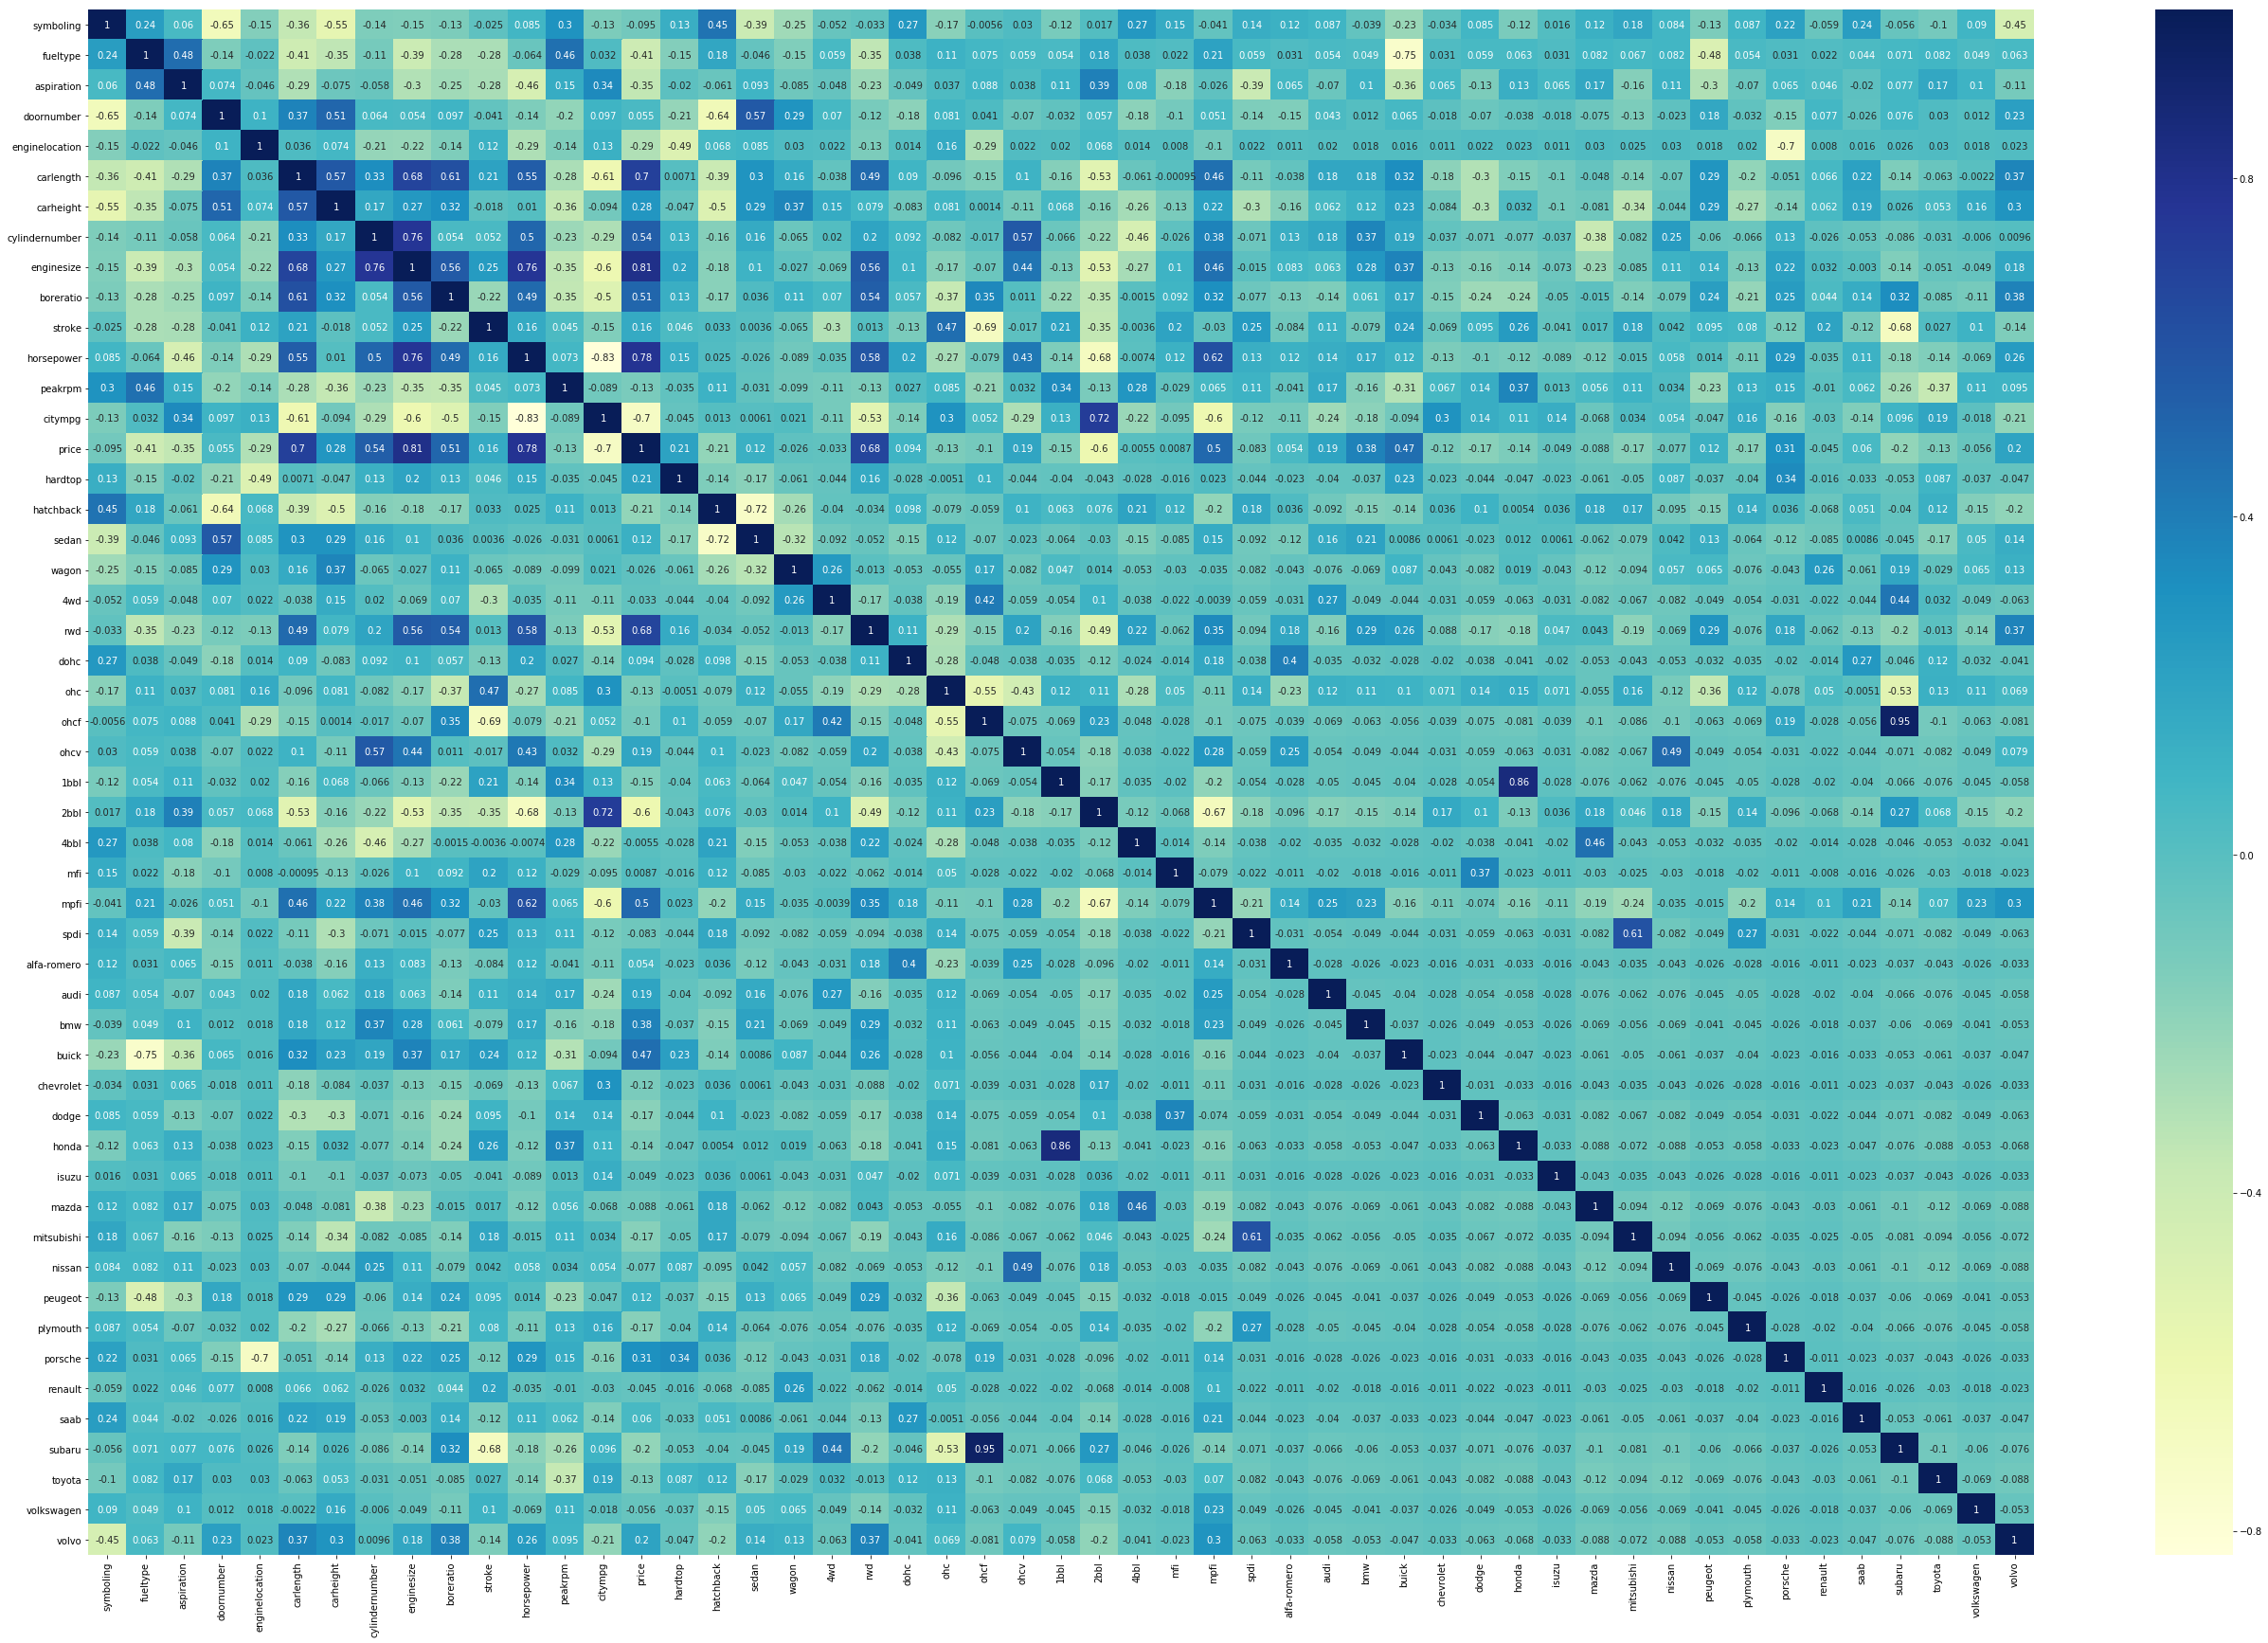

In [188]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (46, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the heatmap we can see few variables are strongly correlated, so we can drop them

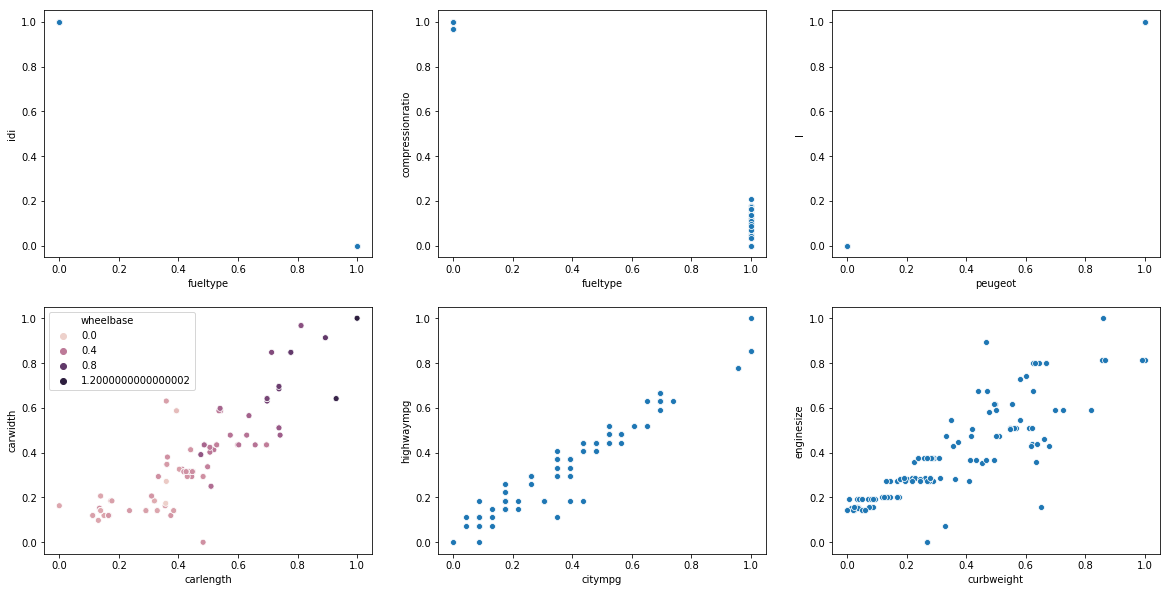

In [186]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
# this tells that if the fueltype=0(diesel) then we go for fuelsystem idi, else we dont use idi.
# So we can drop idi column
sns.scatterplot(x='fueltype',y='idi', data=df_train) #correlation = -1

plt.subplot(2,3,2)
# this tells that if the fueltype=0(diesel) then compressionratio is high, else it is less
# So we can drop compressionratio column
sns.scatterplot(x = 'fueltype', y = 'compressionratio',data = df_train) #correlation -0.97

plt.subplot(2,3,3)
# this tells that if the peugeot=0 then enginetype is 'l' 
# So we can drop enginetype l column
sns.scatterplot(x = 'peugeot', y = 'l',data = df_train) #correlation 1

plt.subplot(2,3,4)
# this tells that if wheelbase is high then carlength and carwidth is high then enginetype is 'l' 
# So we can drop wheelbase and carwidth. I am assuming carlength
sns.scatterplot(x = 'carlength', y = 'carwidth',hue="wheelbase",data = df_train) #correlation 0.85

plt.subplot(2,3,5)
# this tells that if citympg is high then highwaympg is also high 
# So we can drop highwaympg
sns.scatterplot(x = 'citympg', y = 'highwaympg',data = df_train) #correlation 0.97

plt.subplot(2,3,6)
# this tells that if curbweight is high then enginesize is also high 
# So we can drop curbweight
sns.scatterplot(x = 'curbweight', y = 'enginesize',data = df_train) #correlation 0.84

plt.show()



In [189]:
df_train=df_train.drop(['idi','compressionratio','l','carwidth','wheelbase','highwaympg','curbweight'],axis=1)

KeyError: "['idi' 'compressionratio' 'l' 'carwidth' 'wheelbase' 'highwaympg'\n 'curbweight'] not found in axis"

### Dividing into X and Y sets for the model building

In [190]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination after multiple experiments fixed this number 10

In [191]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 36),
 ('fueltype', False, 37),
 ('aspiration', False, 21),
 ('doornumber', False, 22),
 ('enginelocation', False, 32),
 ('carlength', True, 1),
 ('carheight', False, 7),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 12),
 ('citympg', False, 28),
 ('hardtop', False, 6),
 ('hatchback', False, 3),
 ('sedan', False, 5),
 ('wagon', False, 4),
 ('4wd', False, 39),
 ('rwd', False, 9),
 ('dohc', False, 10),
 ('ohc', False, 13),
 ('ohcf', False, 26),
 ('ohcv', False, 11),
 ('1bbl', False, 34),
 ('2bbl', False, 16),
 ('4bbl', False, 14),
 ('mfi', False, 19),
 ('mpfi', False, 17),
 ('spdi', False, 20),
 ('alfa-romero', False, 2),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 29),
 ('dodge', False, 35),
 ('honda', False, 18),
 ('isuzu', False, 8),
 ('mazda', False, 23),
 ('mitsubishi', False, 31),
 ('nissan', False, 27),
 ('peugeot', False

In [192]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     133.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.86e-58
Time:                        16:28:38   Log-Likelihood:                 187.60
No. Observations:                 126   AIC:                            -353.2
Df Residuals:                     115   BIC:                            -322.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3738      0.096      3.

In [193]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,356.44
3,enginesize,48.46
2,cylindernumber,21.11
4,boreratio,15.17
5,stroke,5.65
6,horsepower,3.26
1,carlength,3.16
9,buick,1.57
10,porsche,1.31
7,audi,1.30


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `enginesize` has a significantly high VIF (`48.46`). Hence, dropping this variable

In [194]:
X_train_new = X_train_rfe.drop(["enginesize"], axis = 1)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_new).fit()   

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.04e-56
Time:                        16:28:40   Log-Likelihood:                 178.71
No. Observations:                 126   AIC:                            -337.4
Df Residuals:                     116   BIC:                            -309.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0022      0.039      0.

In [195]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.70
3,boreratio,3.30
1,carlength,3.14
5,horsepower,2.36
2,cylindernumber,1.88
4,stroke,1.59
9,porsche,1.31
8,buick,1.26
6,audi,1.25
7,bmw,1.25


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `cylindernumber` had a high p-value (`0.731`) as well. Hence, this variable isn't of much use and should be dropped.

In [196]:
X_train_new2 = X_train_new.drop(["cylindernumber"], axis = 1)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_new2).fit()   

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.28e-57
Time:                        16:28:42   Log-Likelihood:                 178.64
No. Observations:                 126   AIC:                            -339.3
Df Residuals:                     117   BIC:                            -313.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0068      0.028     -0.237      0.8

In [197]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.62
1,carlength,3.01
2,boreratio,2.85
4,horsepower,1.83
3,stroke,1.50
8,porsche,1.29
5,audi,1.24
7,buick,1.20
6,bmw,1.12


### Dropping the Variable and Updating the Model
As you can notice some of the variable have high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `boreratio` has high p-value (0.568) as well. Hence, this variable isn't of much use and should be dropped.

In [198]:
X_train_new3 = X_train_new2.drop(["boreratio"], axis = 1)

# Running the linear model
lm4 = sm.OLS(y_train,X_train_new3).fit()   

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     167.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.75e-58
Time:                        16:28:43   Log-Likelihood:                 178.47
No. Observations:                 126   AIC:                            -340.9
Df Residuals:                     118   BIC:                            -318.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0176      0.021     -0.831      0.4

In [199]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.39
1,carlength,1.77
3,horsepower,1.73
6,buick,1.20
7,porsche,1.20
2,stroke,1.14
5,bmw,1.08
4,audi,1.07


### Dropping the Variable and Updating the Model
As you can notice some of the variable have high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `stroke` has high p-value (0.415) as well. Hence, this variable isn't of much use and should be dropped.

In [200]:
X_train_new4 = X_train_new3.drop(['stroke'], axis=1)

# Running the linear model
lm5 = sm.OLS(y_train,X_train_new4).fit()   

#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     195.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.57e-59
Time:                        16:28:45   Log-Likelihood:                 178.11
No. Observations:                 126   AIC:                            -342.2
Df Residuals:                     119   BIC:                            -322.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0312      0.013     -2.372      0.0

In [201]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,5.94
1,carlength,1.76
2,horsepower,1.70
6,porsche,1.17
5,buick,1.15
4,bmw,1.07
3,audi,1.06


#### Eventhough const have VIF 5.94 I ignored in the final model because in my experiments after removing const, other variables VIF didnt increase more than 5 and when I plotted error terms with const and without const I can see difference in the q-q plot and other residual plots to analyze which is better. In my analysis with const is better compared to without const variable

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [202]:
y_train_price = lm5.predict(X_train_new4)

#to get residuals using lm5.resid
res = lm5.resid

X_train_new4.columns

Index(['const', 'carlength', 'horsepower', 'audi', 'bmw', 'buick', 'porsche'], dtype='object')

### 1. To check if residuals are normally distributed using histogram and q-q plot

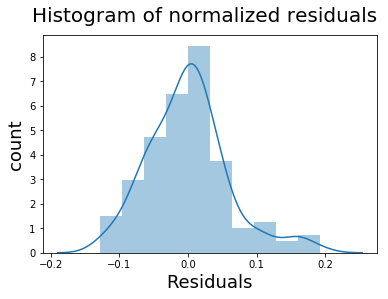

In [203]:
# Plot the histogram of residuals
fig = plt.figure()
fig.suptitle('Histogram of normalized residuals', fontsize = 20)  
sns.distplot(res, bins = 10)
plt.xlabel('Residuals', fontsize = 18) # X-label
plt.ylabel('count',fontsize=18)
plt.show()

<Figure size 432x288 with 0 Axes>

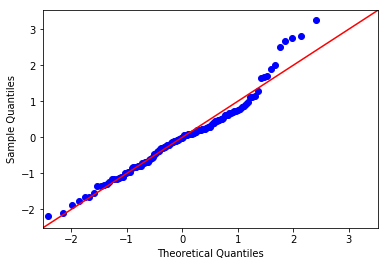

In [204]:
import statsmodels.api as sm
fig = plt.figure()
fig.suptitle('Q-Q plot of normalized residuals', fontsize = 20)  
sm.qqplot(res,fit=True, line='45') # by default it is normal distribution
plt.show()

### 2. Predicted Variables vs Residuals plots to show that residuals are independent of each other

#### Next, we can plot the residuals versus each of the predicting variables to look for independence assumption. If the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the assumption holds true. In this particular problem, we observe some clusters.

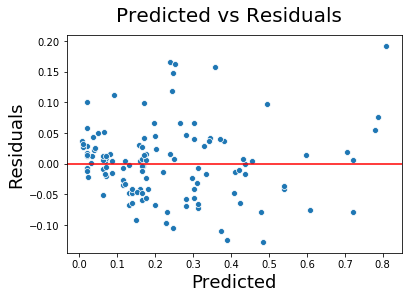

In [205]:
#We can see the residuals are independent

fig = plt.figure()
fig.suptitle('Predicted vs Residuals', fontsize = 20)  # Plot heading 
sns.scatterplot(y=res,x=y_train_price)
plt.axhline(0, color='red')
plt.xlabel('Predicted', fontsize = 18)  
plt.ylabel('Residuals', fontsize = 18) 
plt.show()

### 3.Fitted vs. residuals plot to check homoscedasticity

#### When we plot the fitted response values (as per the model) vs. the residuals, we clearly observe that the variance of the residuals increases with response variable magnitude. Therefore, the problem does not respect homoscedasticity and some kind of variable transformation may be needed to improve model quality.

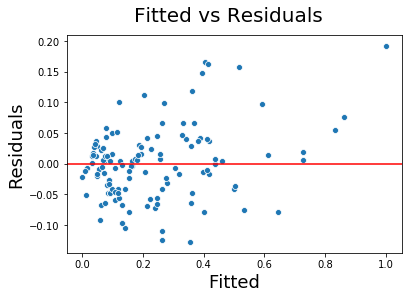

In [206]:
fig = plt.figure()
fig.suptitle('Fitted vs Residuals', fontsize = 20)  # Plot heading 

sns.scatterplot(y=res,x=y_train)
plt.axhline(0, color='red')
plt.xlabel('Fitted', fontsize = 18)  
plt.ylabel('Residuals', fontsize = 18) 
plt.show()

In [207]:
y_train.shape #no of rows in y_train

(126,)

### Plot Actual vs Predicted values

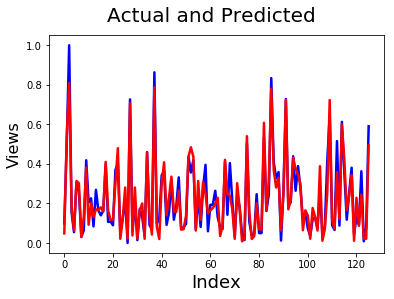

In [208]:
#Actual vs Predicted
c = [i for i in range(0,126,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-") #Actual is blue
plt.plot(c,y_train_price, color="red",  linewidth=2.5, linestyle="-") #Predicted is red
fig.suptitle('Actual and Predicted', fontsize=20)  # Plot heading 
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Views', fontsize=16) # y-label  
plt.show()

In [209]:
from sklearn.metrics import mean_squared_error, r2_score

# From wikipedia : In regression analysis, the term mean squared error is sometimes used to refer to the unbiased estimate of error variance: the residual sum of squares divided by the number of degrees of freedom.

mse = mean_squared_error(y_train, y_train_price)
r_squared = r2_score(y_train, y_train_price)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00346494920525688
r_square_value : 0.9079282222025749


#### R_square and Adjusted R-sqaure for our test set is also 90%. This means 90% of the variation in train set can be explained by 'carlength', 'horsepower', companyname('audi', 'bmw', 'buick', 'porsche')

## Making Predictions

#### Applying the scaling on the test sets

In [210]:
# Apply scaler() to all the columns except the '0-1 mapped binary variables' and 'dummy' variables
num_vars = ['symboling','doornumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [211]:
# we dropped these highly correlated columns after looking into heat map 
df_test=df_test.drop(['idi','compressionratio','l','carwidth','wheelbase','highwaympg','curbweight'],axis=1)

y_test = df_test.pop('price')
X_test = df_test

In [212]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_new4.columns]

# Making predictions
y_pred = lm5.predict(X_test_new)


## Model Evaluation

Text(0, 0.5, 'y_pred')

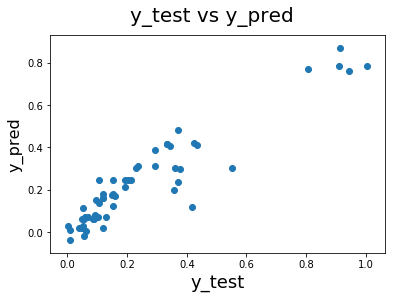

In [213]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [214]:
#### Acutal vs Predicted can be plotted in different ways

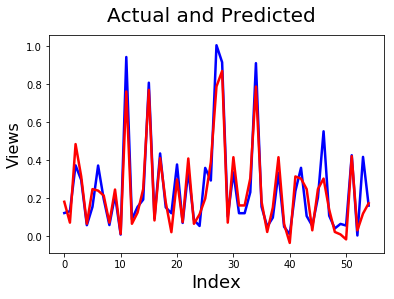

In [215]:
#Actual vs Predicted
c = [i for i in range(0,55,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 
plt.show()

In [216]:
from sklearn.metrics import mean_squared_error, r2_score

# From wikipedia : In regression analysis, the term mean squared error is sometimes used to refer to the unbiased estimate of error variance: the residual sum of squares divided by the number of degrees of freedom.

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.007921073989104462
r_square_value : 0.8712330353872697


### Conclusion

#### This analysis has shown that the price of an automobile can be confidently predicted from its characteristics. 
- In particular, the `CompanyName or manufacturer`, `horsepower`, and `carlength` have a significant effect on the price of an automobile. 


We can see that the equation of our best fitted line is:

$ price = (-0.0312) + 0.2546  \times  carlength + 0.4057  \times  horsepower + 0.1 \times audi + 0.2762 \times bmw + 0.3853 \times buick + 0.3210 \times porsche $


#### Here audi, bmw, buick, porsche are dummy variables for CompanyName. If CompanyName has any of these 4 variables then the coefficients come into play while predicting the price. And these 4 are high priced cars compared to others

#### carlength is strongly correlated to carwdith, wheelbase, curbweight. We can train the model with any 1 of these variables. In my final model I took carlength to explain the price.